## Материалы:
[Презентация](https://drive.google.com/file/d/1HNLkVv5RkC1cJOUbN_mPK-Ea2Ziq1Ngd/view?usp=sharing)

[Дашборт](https://public.tableau.com/views/final_project_mobile/ProjectMobileapp?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## **Описание проекта**
**Мобильные приложения — Анализ поведения пользователей в мобильном приложении**

**Описание проекта:**
работа производится для команды сервиса «Ненужные вещи». Пользователи совершают много действий в приложении, в этих данных есть инсайты, которые позволят компании стать лучшим приложением для продажи ненужных вещей. Топ-менеджмент компании хотят узнать, насколько эффективны дополнения, которые были добавлены в приложение за последнее время.


**Цель:** определение влияния событий на совершение целевого действия – пользователь посмотрел номер телефона.


**Описание данных:**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи".

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Колонки в *mobile_sources.csv*: 

- `userId` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.

Колонки в mobile_dataset.csv: **

- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Виды действий:

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.


**План проекта:**

[Шаг №1. Загрузим данные и подготовим их к анализу](#file_info)
  
[Шаг №2. Предобработка данных](#data_check)
  
[Шаг №3. Исследовательский анализ данных](#data_analysis)

[Шаг №4 Проанализируем влияние событий на совершение целевого события](#rest_analysis)

[Шаг №5. Выдвигаем гипотезы](#gipotes)
  
[Шаг №6. Сделаем общий вывод.](#conclution)

<a id='file_info'></a>  
## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
from matplotlib.pyplot import figure
from statsmodels.stats.proportion import proportions_ztest

from plotly import graph_objects as go
from scipy import stats as st

from io import BytesIO
import requests

In [2]:
spreadsheet_id = "1lxTd0oMdhltP32V1kO_lENpqNC-RdPKbBwW9UbmyOsk"
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_mobile = pd.read_csv(BytesIO(r.content))

display(df_mobile.sample(10, random_state=1))
display(df_mobile.info())
print ('Количесто дубликатов: {:.0f}'.format(df_mobile.duplicated().sum()))

,event.time,event.name,user.id
45370,2019-10-24 19:51:07.738964,tips_show,072629a4-8281-4eaf-b6dc-175ccb6c316a
34809,2019-10-21 12:08:17.074072,tips_show,e38cb669-7335-4d56-9de5-c8d5d2f13fd3
41465,2019-10-23 16:03:40.017925,tips_show,08b25050-2a3d-48af-bb45-ac437ec7ed3d
13580,2019-10-13 11:10:43.791104,search_1,3d5a91de-062a-485a-b486-d67e5d802cd8
56377,2019-10-28 15:22:34.314256,tips_show,d6a70d32-e890-49ea-a006-7f93a117ca37
54097,2019-10-27 20:00:06.637394,photos_show,13140930-df18-4793-a230-7cca5c8813db
1258,2019-10-07 16:25:58.188846,tips_show,c04bf0ba-942e-4ea1-ac7a-5b56542dc6a0
57435,2019-10-28 20:46:21.566483,tips_show,19d741ba-2bae-4108-8eee-3c72a27b6c0c
48727,2019-10-25 22:53:46.388249,tips_show,a6743146-4e51-43bd-84e3-c36ee4247124
47316,2019-10-25 14:28:27.599486,search_1,2420c4df-c998-4309-9644-cac8b5e03773


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

Количесто дубликатов: 0


In [3]:
spreadsheet_id = "1k1k97UGiE00SJ3Q79opAqT6R4Xf1-ykyL7_hIWQwpmU"
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_soures = pd.read_csv(BytesIO(r.content))

display(df_soures.sample(10, random_state=1))
display(df_soures.info())
print ('Количесто дубликатов: {:.0f}'.format(df_soures.duplicated().sum()))

,userId,source
2359,2bbb107e-4b8c-4e73-9c77-a2c0add1cfe2,other
2838,cf5735bc-6dba-4348-b558-06e99ea597f9,yandex
1882,3521521c-99cb-4142-96cb-0b97cd5c60e6,yandex
1459,ae3ba452-dda0-4107-b0eb-51c060ef511e,google
2920,a273950e-dc7a-45b7-a9e6-5fe6c02b8971,other
941,8ca6b3b3-0237-4aba-bb1d-bdcb67133524,google
3486,472754c2-e86c-47c8-9c46-3c3a2ced94ec,yandex
280,f0ca6d7b-65d7-4b04-ba27-d3cc49f16429,google
3594,889db4da-0f3b-4ec0-8618-6a603a950cb0,yandex
608,3a9df3a6-84f9-416a-a363-a0dd1af58131,yandex


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

Количесто дубликатов: 0


<a id='data_check'></a>  
## Предобработка данных

В таблице df_mobile и df_soures приведем наименование столбцов к единому стилю:

In [4]:
df_mobile.columns = df_mobile.columns.str.replace('.','_')
df_soures = df_soures.rename(columns={"userId": "user_id"})

<ipython-input-4-da94827c8447>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_mobile.columns = df_mobile.columns.str.replace('.','_')


Согласно описанию проекта contacts_show и show_contacts — оба события, означающие - посмотрел номер телефона, заменим show_contacts на contacts_show для удобства дальнейшего анализа.

In [5]:
df_mobile['event_name'] = df_mobile['event_name'].replace('show_contacts', 'contacts_show')

Столбец с датой приведем к дипу данных datetime

In [6]:
df_mobile['event_time'] = pd.to_datetime(df_mobile['event_time']).apply(lambda x: x.replace(microsecond=0))
df_mobile.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


**Вывод:** дубликатов и пропущенных значений в таблице не содержится, типы данных, где необходимо, исправлены. Наименование столбцов и их содержимого приведено к единому стилю.  Данные готовы к дальнейшему анализу.

<a id='data_analysis'></a>  
## Исследовательский анализ данных

1. Сколько всего событий в логе?

In [7]:
df_mobile['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7'], dtype=object)

2. Сколько всего пользователей в логе?

In [8]:
print('Уникальных пользователей: {}'.format(df_mobile['user_id'].nunique()))

Уникальных пользователей: 4293


3. Сколько в среднем событий приходится на пользователя

In [9]:
avr_df = df_mobile.groupby('user_id')['event_name'].agg('count').reset_index()
print('В среднем событий приходится на пользователя: {}'.format(round(avr_df['event_name'].mean(),2)))
print('Медианое значение количества событий на пользователя: {}'.format(round(avr_df['event_name'].median(),2)))
print('Мода количества событий на пользователя: {}'.format(round(avr_df['event_name'].mode()[0],2)))

В среднем событий приходится на пользователя: 17.28
Медианое значение количества событий на пользователя: 9.0
Мода количества событий на пользователя: 5


4. Данными за какой период мы располагаем? Найдем максимальную и минимальную дату. Построим гистограмму по дате и времени.

In [10]:
print('Период с {} до {}'.format(df_mobile['event_time'].min().strftime('%Y-%m-%d'), df_mobile['event_time'].max().strftime('%Y-%m-%d')))

Период с 2019-10-07 до 2019-11-03


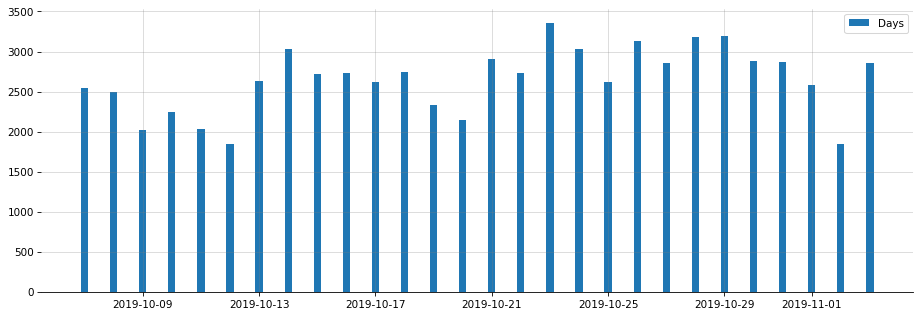

In [11]:
d = {'m':'Minute', 'h': 'Hours', 'D': 'Days'}
fig, axes = plt.subplots(nrows=1, figsize=(15, 5), dpi=75)
for idx, interval in enumerate(['D']):
    # ограничим дату до интервала
    tmp = df_mobile.assign(dt_hour=lambda row: row['event_time'].astype(f'datetime64[{interval}]'))\
        .groupby('dt_hour').agg({'user_id': 'count'})
    axes.bar(x=tmp.index, height=tmp['user_id'], label=d[interval], width=0.25)
    axes.grid(color='grey', alpha=0.5, linewidth=0.5)
    sns.despine(left=True, right=True, top=True, ax=axes)
    axes.legend();

У нас одинаково полные данные за весь период с 2019-10-07 до 2019-11-03

<a id='rest_analysis'></a>  
## Проанализируем влияние событий на совершение целевого события

1. Посмотрим, какие действия чаще всего совершают пользователи

In [12]:
log_frequency = df_mobile.groupby('event_name')['user_id'].agg('count').reset_index().sort_values(by = 'user_id', ascending = False)
log_frequency

,event_name,user_id
14,tips_show,40055
5,photos_show,10012
0,advert_open,6164
2,contacts_show,4529
4,map,3881
6,search_1,3506
3,favorites_add,1417
10,search_5,1049
13,tips_click,814
9,search_4,701


Топ три чаще выполняемых действия:

   - увидел рекомендованные объявления
    
   - просмотрел фотографий в объявлении
    
   - открыл карточки объявления
   
Можно считать, что это три стандартных действия, которые совершают практически все пользователи.

Посмотрел номер телефона - целевое действие находиться на 4-ом месте.


2. Отсортируем события по числу уникальных пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [13]:
one_event_share = df_mobile.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()
one_event_share['total'] = df_mobile['user_id'].nunique()
one_event_share['share'] =round(one_event_share['user_id']/one_event_share['total'],3)
one_event_share

,event_name,user_id,total,share
0,tips_show,2801,4293,0.652
1,map,1456,4293,0.339
2,photos_show,1095,4293,0.255
3,contacts_show,981,4293,0.229
4,search_1,787,4293,0.183
5,advert_open,751,4293,0.175
6,search_5,663,4293,0.154
7,search_4,474,4293,0.110
8,favorites_add,351,4293,0.082
9,search_6,330,4293,0.077


Здесь мы видим, что на самом деле очень много пользователей хотя бы раз совершают действие - просмотр карты, оно на втором месте.

3. С помощью методов group by и merge разделим пользователей на две группы, в первой будут находится те, которые просматривают контакты. Остальных пользователей определим во вторую группу.

3.1 Выделим в группу №1 пользователей, которые просматрели контакты.

In [14]:
df_mobile_filtred = df_mobile[df_mobile['event_name'] == 'contacts_show']
df_mobile_filtred['group'] = 1
df_mobile_filtred = df_mobile_filtred[['user_id', 'group']]
df_mobile_filtred = df_mobile_filtred.drop_duplicates().reset_index(drop = True)
df_mobile_filtred.head()

<ipython-input-14-1ac41a0126b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile_filtred['group'] = 1


,user_id,group
0,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,1
1,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,1
2,9dfa242e-8630-480a-806b-5736bcda8f3d,1
3,1a3361d1-2002-4389-a669-ecb06ea7a90a,1
4,be95e2a4-50e3-4763-bc00-1758848d2641,1


3.2 Остальных пользователей определим во вторую группу:

In [15]:
df_mobile_filtred = df_mobile.merge(df_mobile_filtred, on = 'user_id', how = 'left')
df_mobile_filtred['group'].fillna(2, inplace=True)
df_mobile_filtred

,event_time,event_name,user_id,group
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2.0
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2.0
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2.0
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2.0
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2.0
...,...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,1.0
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,1.0
74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902,2.0
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,1.0


4. Подсчитаем, какие действия чаще совершают пользователи в каждой группе. Сравним частоту действий у этих групп.

4.1 Для каждой группы и события считаем кол-во уникальных пользователей. Далее проверим гипотезы - Доли события X в группах равны. За кол-во успехов берем общий размер группы (кол-во уникальных пользователей в каждой из групп). 

    Нулевая гипотеза H₀ - доли групп равны;
    Альтернативной гипотеза - доли групп не равны.

Посмотрим, сколько уникальных пользователей в каждой группе

In [16]:
users_total_table = df_mobile_filtred.groupby('group', as_index=False).agg({'user_id': 'nunique'})
users_total_table

,group,user_id
0,1.0,981
1,2.0,3312


Создадим таблицу, где отобразим конверсию каждой группы для каждого события:

In [17]:
events_table = df_mobile_filtred.pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique')\
    .sort_values(by=1, ascending=False)
events_table = events_table.dropna()
events_table = events_table.reset_index()

events_table['total_1'] = users_total_table[users_total_table['group'] == 1]['user_id'][0]
events_table['total_2'] = users_total_table[users_total_table['group'] == 2]['user_id'][1]
events_table['total_1_share'] = events_table[1] / events_table['total_1']
events_table['total_2_share'] = events_table[2] / events_table['total_2']
events_table['diff'] = round(events_table['total_1_share'] - events_table['total_2_share'],3)
events_table = events_table.sort_values(by = 'diff', ascending = False)

#Исправим тип данных для столбцов 1 и 2
events_table[1] = events_table[1].astype('int')
events_table[2] = events_table[2].astype('int')
events_table

group,event_name,1.0,2.0,total_1,total_2,total_1_share,total_2_share,diff
1,photos_show,339,756,981,3312,0.345566,0.228261,0.117
3,search_1,237,550,981,3312,0.241590,0.166063,0.076
5,favorites_add,136,215,981,3312,0.138634,0.064915,0.074
7,tips_click,100,222,981,3312,0.101937,0.067029,0.035
9,search_2,55,187,981,3312,0.056065,0.056461,-0.000
11,search_3,38,170,981,3312,0.038736,0.051329,-0.013
12,search_7,25,132,981,3312,0.025484,0.039855,-0.014
8,search_4,88,386,981,3312,0.089704,0.116546,-0.027
10,search_6,52,278,981,3312,0.053007,0.083937,-0.031
4,advert_open,138,613,981,3312,0.140673,0.185085,-0.044


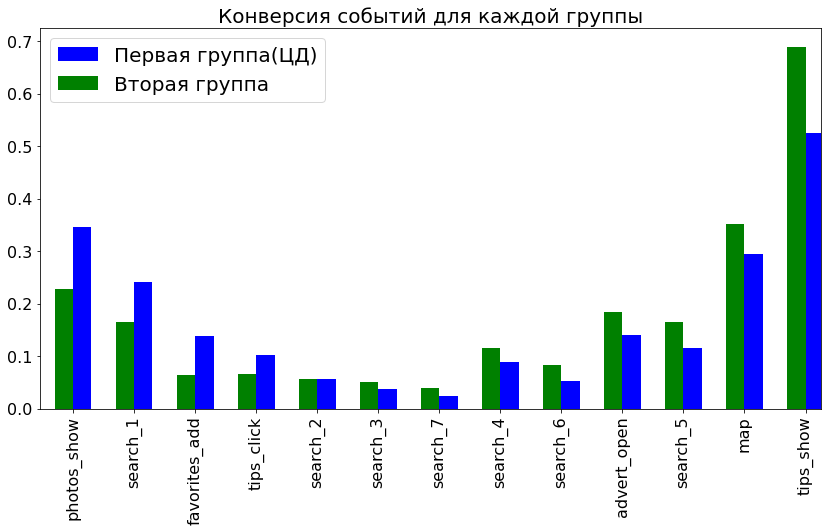

In [18]:
ax = plt.gca()

plot1 = events_table['total_1_share']
plot1.plot(kind='bar', figsize=(14,7), ax=ax, width=0.3, color='blue', position=0)

plot2 = events_table['total_2_share']
plot2.plot(kind='bar', figsize=(14,7), ax=ax, width=0.3, color='green', position=1)

ax.set_xticklabels(events_table['event_name'].values)
ax.set_title('Конверсия событий для каждой группы', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
ax.legend(['Первая группа(ЦД)', 'Вторая группа'], fontsize=20)

In [19]:
def z_value_method(data, column):
    alpha = 0.05

    for idx, row in data.iterrows():
        print ('Проверим гипотезу для события {}'.format(row[column]))
        _, pvalue = proportions_ztest([row[1], row[2]], [row['total_1'], row['total_2']])
        print('p-значение: {}'.format(pvalue))
        if (pvalue < alpha):
            print ('Отвергаем нулевую гипотезу')
        else:
            print ('Не получилось отвергнуть нулевую гипотезу')
        print('')    

In [20]:
z_value_method(events_table, 'event_name')

Проверим гипотезу для события photos_show
p-значение: 1.327635267603621e-13
Отвергаем нулевую гипотезу

Проверим гипотезу для события search_1
p-значение: 7.875225321490657e-08
Отвергаем нулевую гипотезу

Проверим гипотезу для события favorites_add
p-значение: 1.3455950096729165e-13
Отвергаем нулевую гипотезу

Проверим гипотезу для события tips_click
p-значение: 0.00026645646284051216
Отвергаем нулевую гипотезу

Проверим гипотезу для события search_2
p-значение: 0.9623149570575524
Не получилось отвергнуть нулевую гипотезу

Проверим гипотезу для события search_3
p-значение: 0.1066552401903203
Не получилось отвергнуть нулевую гипотезу

Проверим гипотезу для события search_7
p-значение: 0.035185486782364196
Отвергаем нулевую гипотезу

Проверим гипотезу для события search_4
p-значение: 0.018465425248742617
Отвергаем нулевую гипотезу

Проверим гипотезу для события search_6
p-значение: 0.001401839373252087
Отвергаем нулевую гипотезу

Проверим гипотезу для события advert_open
p-значение: 0.00

**Вывод**: мы видим, что только для четырех событий конверсия для первой группы (в которой пользователи просматривали контакты) выше, чем для второй: просмотрел фотографий в объявлении, search_1, добавил объявление в избранное, кликнул по рекомендованному объявлению. При этом, например, конверсия для события  tips_show - увидел рекомендованные объявления, которое пользователи совершаю чаще всего, для первой группы намного ниже.

Из всех событий доли групп статистически равны только для search_2 и search_3.


  5. Проведем еще один анализ:
  
5.1 Разделим клиентов на N категорий в зависимости от того, какое последнее событие они совершили перед целевым, если целевое действие не совершенно, то определяем в группу по последнему совершенному действию (т.е последнее действие, на котором они остановились). 

5.1.1 Для начала добавим нумерацию каждой сессии 

In [21]:
#Скопируем датасет и добавим столбец diff с разницей между событиями
event_df = df_mobile.copy(deep=True)
event_df['diff'] = event_df.groupby('user_id')['event_time'].diff(1)
event_df = event_df.reset_index()

#Cоздадим вспомогательный датафрейм ’session_start_df’, который будет содержать события, которые будут считаться первыми событиями сессий: 
#произошли спустя более чем 30 минут после предыдущего и были первыми для пользователя (NaT в колонке ’diff’)
sessions_start_df = event_df[(event_df['diff'].isnull()) | (event_df['diff'] > '1800 seconds')]
sessions_start_df['session_id'] = sessions_start_df['index']

#С помощью функции merge_asof объединим между собой данные основного и вспомогательного датафреймов
event_df = event_df.sort_values('index')
sessions_start_df = sessions_start_df.sort_values('index')
event_df = pd.merge_asof(event_df,sessions_start_df[['index','user_id','session_id']],on='index',by='user_id')
event_df.head()

<ipython-input-21-65420ad5a319>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sessions_start_df['session_id'] = sessions_start_df['index']


,index,event_time,event_name,user_id,diff,session_id
0,0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,NaT,0
1,1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,0 days 00:00:01,0
2,2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,NaT,2
3,3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,0 days 00:00:06,0
4,4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,0 days 00:00:54,2


5.1.2 Выделим максимальное-последнее время в сессии, предварительно исключив contacts_show

In [22]:
event_df_non_goal = event_df.loc[event_df['event_name'] != 'contacts_show']

In [23]:
last_activity_by_visitors = event_df_non_goal.groupby(['user_id', 'session_id'])['event_time'].max().reset_index()
last_activity_by_visitors['group'] = 'last'
last_activity_by_visitors

,user_id,session_id,event_time,group
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,805,2019-10-07 13:49:41,last
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,6541,2019-10-09 18:42:22,last
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,36412,2019-10-21 20:07:30,last
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,37556,2019-10-22 11:30:52,last
4,00157779-810c-4498-9e05-a1e9e3cedf93,31632,2019-10-19 21:59:54,last
...,...,...,...,...
10168,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,69525,2019-11-02 01:16:48,last
10169,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,70585,2019-11-02 18:01:27,last
10170,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,70771,2019-11-02 19:30:50,last
10171,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,72321,2019-11-03 14:48:44,last


Объединими датасеты, чтобы к основному добавить признак последней даты и оставим только последнии события

In [24]:
event_df_non_goal = event_df_non_goal.merge(last_activity_by_visitors, on = ['user_id','session_id','event_time'], how = 'left')
event_df_non_goal = event_df_non_goal[event_df_non_goal['group'] == 'last']
event_df_non_goal

,index,event_time,event_name,user_id,diff,session_id,group
25,26,2019-10-07 00:05:23,search_5,d9b06b47-0f36-419b-bbb0-3533e582a6cb,0 days 00:00:03,25,last
68,69,2019-10-07 00:18:42,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,0 days 00:00:05,0,last
81,83,2019-10-07 00:30:22,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,0 days 00:07:45,12,last
96,98,2019-10-07 00:41:40,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,0 days 00:00:22,2,last
104,106,2019-10-07 00:50:22,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,0 days 00:00:10,37,last
...,...,...,...,...,...,...,...
69652,74181,2019-11-03 23:47:35,photos_show,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,0 days 06:52:50,74181,last
69654,74183,2019-11-03 23:47:50,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,0 days 00:00:03,74177,last
69660,74189,2019-11-03 23:52:01,tips_click,c10055f0-0b47-477a-869e-d391b31fdf8f,0 days 00:00:53,74176,last
69665,74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902,7 days 04:25:16,74194,last


И создадим таблицу только с ЦД

In [25]:
goal_group = event_df[event_df['event_name'] == 'contacts_show']
goal_group = goal_group[['user_id', 'event_name', 'session_id']].drop_duplicates().reset_index(drop= True)
goal_group

,user_id,event_name,session_id
0,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,contacts_show,12
1,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,contacts_show,191
2,9dfa242e-8630-480a-806b-5736bcda8f3d,contacts_show,244
3,1a3361d1-2002-4389-a669-ecb06ea7a90a,contacts_show,322
4,be95e2a4-50e3-4763-bc00-1758848d2641,contacts_show,335
...,...,...,...
1698,87a6fff9-134a-467d-a100-a606995025cd,contacts_show,74080
1699,ec70be94-3ea7-4ac2-90fb-da1a044d7e30,contacts_show,74145
1700,28fccdf4-7b9e-42f5-bc73-439a265f20e9,contacts_show,74074
1701,a0944ccf-5813-427a-966e-b146d4e9adbc,contacts_show,74107


Объединим две последние таблицы в результирующую

In [26]:
event_df_result = event_df_non_goal[['user_id', 'session_id', 'event_name']].merge(goal_group, on = ['user_id', 'session_id'], how = 'left')
event_df_result
event_df_result = event_df_result.groupby('event_name_x').agg({'user_id': 'count', 'event_name_y': 'count'})
event_df_result['share'] = event_df_result['event_name_y']/event_df_result['user_id']
event_df_result = event_df_result.rename(columns={"user_id": "total_q-ty", "event_name_y": "contact_show"})
event_df_result.sort_values(by = 'contact_show', ascending = False)

,total_q-ty,contact_show,share
event_name_x,,,
tips_show,5727,813,0.141959
photos_show,2340,273,0.116667
contacts_call,236,236,1.000000
search_1,847,88,0.103896
advert_open,338,38,0.112426
map,365,34,0.093151
favorites_add,233,31,0.133047
search_5,180,14,0.077778
tips_click,56,8,0.142857


**Вывод**: чаще всего, прежде чем посмотреть контакты, пользователи совершали событие - увидел рекомендованные объявления.
На втором месте - просмотрел фотографий в объявлении. Т.е обычно пользователю приложения достаточно увидеть объявление и посмотреть фото, чтобы решить позвонить. Третье место занимает позвонил по номеру из объявления - его в расчет не берем, т.к это логичное следствие.

<a id='gipotes'></a>  
## Выдвигаем гипотезы


Гипотеза 1.
Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Проверим гипотезу: конверсия в просмотры контактов различается у этих двух групп. 

Проверка:
Выделим две группы, в одной пользователи совершили tips_show и tips_click, в другой только tips_show. Для этого медом pivot_table создадим таблицу с двумя колонками tips_show  и tips_click, в которых будет количество кликов на эти события. Далее оставим в одной группе тех пользователей, для которых есть значение только в одном столбце tips_show, пользователи, для которых есть посещения в обоих столбцах, в другой группе. 

Подсчитаем конверсию, выполним проверку гипотезы о равенстве долей Z-критерием.

In [27]:
#Подсчитаем для каждого пользователя, сколько каждого события он совершил
events_table = df_mobile_filtred.pivot_table(index='user_id', columns='event_name', values='event_time', aggfunc='count')
events_table = events_table.reset_index()
events_table = events_table[['user_id','tips_show', 'tips_click','contacts_show']]
events_table = events_table.sort_values(by = 'tips_show', ascending = False)
events_table

event_name,user_id,tips_show,tips_click,contacts_show
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,346.0,1.0,43.0
3397,cb36854f-570a-41f4-baa8-36680b396370,317.0,7.0,86.0
740,28fccdf4-7b9e-42f5-bc73-439a265f20e9,294.0,2.0,2.0
2887,abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c,265.0,NaN,21.0
3223,c140f88a-c544-4ce6-a6bd-578a1a0d1b18,239.0,NaN,1.0
...,...,...,...,...
4276,fe898476-a038-4717-875d-b01e8cddf537,NaN,NaN,NaN
4277,fe92fa6c-7eef-484f-b31b-fa0db4e4d895,NaN,NaN,NaN
4284,ff1554b5-919e-40b1-90bb-ee1f7f6d5846,NaN,NaN,1.0
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,NaN,NaN,1.0


In [28]:
#Выделим первую группу, где два события tips_show и tips_click
tips_show_click = events_table[(~events_table['tips_show'].isnull()) & (~events_table['tips_click'].isnull())]
tips_show_click = pd.DataFrame(data=[[tips_show_click['user_id'].count(),tips_show_click['contacts_show'].count()]], columns=['total_q_ty','contacts_show'])
tips_show_click['share'] = round(tips_show_click['contacts_show'] / tips_show_click['total_q_ty'],3)
tips_show_click

,total_q_ty,contacts_show,share
0,297,91,0.306


In [29]:
#Выделим вторую группу, где одно событие tips_show 
tips_show = events_table[(~events_table['tips_show'].isnull()) & (events_table['tips_click'].isnull())]
tips_show = pd.DataFrame(data=[[tips_show['user_id'].count(),tips_show['contacts_show'].count()]], columns=['total_q_ty','contacts_show'])
tips_show['share'] = round(tips_show['contacts_show'] / tips_show['total_q_ty'],3)
tips_show

,total_q_ty,contacts_show,share
0,2504,425,0.17


Нулевая гипотеза H₀ - доли групп равны;

Альтернативной гипотеза - доли групп не равны.

In [30]:
alpha = 0.05
_, pvalue = proportions_ztest([tips_show_click['contacts_show'], tips_show['contacts_show']], [tips_show_click['total_q_ty'], tips_show['total_q_ty']])
print('p-значение: {}'.format(pvalue))
if (pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')
print('')    

p-значение: [9.21831657e-09]
Отвергаем нулевую гипотезу



In [31]:
check = tips_show['total_q_ty'] / tips_show_click['total_q_ty']
check[0]
print ('Во второй группе в {:.0f} раз больше пользователей'.format(check[0]))

Во второй группе в 8 раз больше пользователей


**Вывод:** 

Отвергаем нулевую гипотезу, конверсия первой группы не равна конверсии второй. Оказывается, что те пользователи, которые кликают по рекомендованному объявлению, чаще выполняют целевое действие, чем те, кто просто увидел рекомендованные объявления.
Можно также отметить, что при этом, пользователей, которые совершили и tips_show, и tips_show_click меньше в 8 раз - всего 297.

Гипотеза 2. Имеем, что пользователи устанавливают приложение по трем видам источников: google, yandex, other . Проверим гипотезу: конверсия в просмотры контактов различается у этих трех групп.

Проверка: выделим три групп в зависимости от источника.

Подсчитаем конверсию в просмотры контактов, выполним проверку гипотезы о равенстве долей Z-критерием.


In [32]:
#добавим к основной таблице информацию об источнике из таблицы df_soures
soures_total_table = df_mobile_filtred.merge(df_soures, on = 'user_id')
#выгрузим эту таблицу для использования в Tableau, предварительно заменив тип данны с втолбце с группой на целочисленный
soures_total_table['group'] = soures_total_table['group'].astype('int')
#soures_total_table.to_csv('soures_total_table.csv', encoding='utf-8', index=False)
soures_total_table

,event_time,event_name,user_id,group,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2,other
3,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2,other
4,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2,other
...,...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,2,google
74193,2019-11-03 23:46:58,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2,google
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,2,google
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2,google


In [33]:
#Сгруппируем данные
soures_total_table = soures_total_table.pivot_table(index='source', columns='group', values='user_id', aggfunc='nunique').reset_index()

In [34]:
users_total_table

,group,user_id
0,1.0,981
1,2.0,3312


In [35]:
soures_total_table['total'] = soures_total_table.sum(axis=1)
soures_total_table['total_1'] = users_total_table[users_total_table['group'] == 1]['user_id'][0]
soures_total_table['total_2'] = users_total_table[users_total_table['group'] == 2]['user_id'][1]
soures_total_table['total_1_share'] = soures_total_table[1] / soures_total_table['total_1']
soures_total_table['total_2_share'] = soures_total_table[2] / soures_total_table['total_2']
soures_total_table['diff'] = soures_total_table['total_1_share'] - soures_total_table['total_2_share']

soures_total_table

group,source,1,2,total,total_1,total_2,total_1_share,total_2_share,diff
0,google,275,854,1129,981,3312,0.280326,0.257850,0.022476
1,other,228,1002,1230,981,3312,0.232416,0.302536,-0.070120
2,yandex,478,1456,1934,981,3312,0.487258,0.439614,0.047644


In [36]:
z_value_method(soures_total_table, 'source')

Проверим гипотезу для события google
p-значение: 0.16017834813412735
Не получилось отвергнуть нулевую гипотезу

Проверим гипотезу для события other
p-значение: 1.9850881263797683e-05
Отвергаем нулевую гипотезу

Проверим гипотезу для события yandex
p-значение: 0.008428942598692516
Отвергаем нулевую гипотезу



**Вывод** пользователи, которые установили приложение из источника - Google, равновероятно могут как совершить ЦД, так и не сделать этого , для них не получилось отвергнуть нулевую гипотезу, т.е доли группы_1- пользователи совершившие просмотр контакта и группы_2- пользователи не совершившие ЦД, равны.
Пользователи от Yandex, наоборот более склонны к совершению ЦД.
А вот пользователи, скачавшие приложение из других источников, скорее не совершат ЦД, чем сделают это.


<a id='conclution'></a>  
## Общий вывод

Наиболее часто выполняемые пользователем действия в приложении: увидел рекомендованные объявления, просмотрел фотографий в объявлении, открыл карточки объявления. При этом стоит отметить, что событие - просмотр карты, совершают не так часто, но практически все пользователи.

Из всех имеющихся событий основное влияние на увеличение конверсии в группе, где пользователи совершили ЦД, оказывают следующие действия: просмотр фотографий в объявлении, search_1, добавление объявление в избранное, клик по рекомендованному объявлению. Т.е совершение этих действий пользователем повышает вероятность просмотра контактов.

Такие события как: увидел рекомендованные объявления, открыл карту объявлений, открыл карточки объявления — это те действия, которых достаточно, чтобы получить предварительную информацию об объявлении, т.о в группе пользователей, не совершивших ЦД эти действия преобладают.


Также посмотрели, на каком обычно действии останавливаются пользователи, прежде чем совершить свой выбор объявления, оказалось, что это: tips_show и photos_show — это скорее всего объясняется тем, что в целом эти события самые часто совершаемые.

По итогам проверок гипотез выяснили, что:

1) пользователи, которые помимо того, что увидели рекомендованное объявление еще и кликают на него, совершаю ЦД чаще, чем те, кто просто увидел рекомендованное объявление.

2) пользователи, которые устанавливают приложение из источника Yandex более склонны к совершению ЦД, из источника Google такой склонности не имеют, а пользователи от других источников, с большей вероятностью не совершат просмотр контакта.


Рекомендации:

Так как выяснилось, что  просмотр фотографий в объявлении, search_1, добавление объявление в избранное, клик по рекомендованному объявлению - приводят пользователя к совершению ЦД сильнее остальных событий, можно порекомендовать поработать над ними, еще больше усилив их эффект, так например можно:

1) установить встроенные фильтры, которые будут улучшать качество фотографий товара, чтобы они были более привлекательные для пользователя;

2) кнопку - добавление в избранное – сделать более видимой: увеличить в размере, поработать над ее цветом и яркостью.

3) над кликом по рекомендованному объявлению работать сложнее, т.к пользователь совершит это действие, если в целом объявление заинтересует его, но опять же, можно усилить кликабельность с помощью дополнительных подсветок при наведении курсора на объявление.

Также имеет смысл купить рекламу у Yandex, т.к его аудитория больше проявляет интерес к объявлениям приложения и совершает ЦД. 
